# **Análisis de datos**
## Ana Isabel Moreno Hernández
### NUA: 434232
### Tarea 7

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import mean 

Generamos los puntos aleatorios que puedan ajustarse a la recta $y = 3x + 2$.

In [2]:
x = np.linspace(0, 2, 15)
y_old = 3*x + 2
y = 3*x + 2

error = np.random.normal(0,0.2, size=15)
yerror = []

for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)

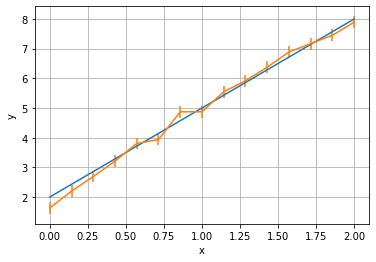

In [3]:
plt.plot(x, y_old)
plt.errorbar(x, y, yerr = yerror)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

In [4]:
x = np.array([x])
y = np.array([y])
yerror = np.array([yerror])

In [5]:
def function(x0, a0, b0):
    return a0*x0 + b0

In [6]:
def likelihood(a, b, data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2)
    return likelihood_0.sum()

Iniciamos con un punto a y b de inicio. Éstos serán 0.5 y 0.5, respectivamente. También comprobamos que la función likelihood funcione correctamente.

In [93]:
a0 = 0.5
b0 = 0.5

likelihood(a0, b0, [x,y,yerror])

6880.612223870878

Ahora generamos puntos alrededor de *a0* y *b0* con una distancia a este centro de 0.1 con la siguiente función:

In [107]:
theta = np.linspace(0, 2*math.pi, 150)

def circle(R, a_c, b_c):
    return (a_c + R*np.cos(theta), b_c + R*np.sin(theta))

Verificamos que sí se haya graficado un círculo alrededor de este punto:

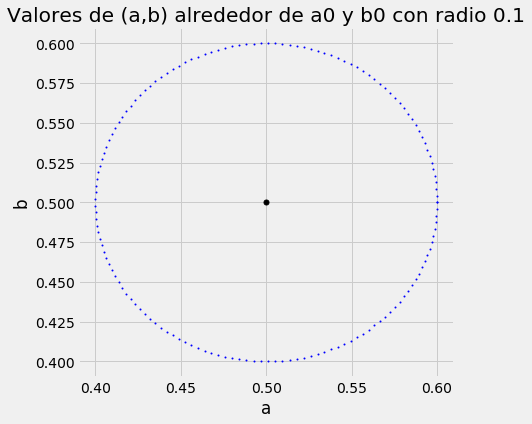

In [111]:
plt.figure(figsize = (6,6))
plt.plot(circle(0.1, a0, b0)[0], circle(0.1, a0, b0)[1], 'ob', markersize = 1)
plt.plot([a0], [b0], 'ok',markersize = 5)
plt.xlabel('a')
plt.ylabel('b')
plt.grid('True')
plt.title('Valores de (a,b) alrededor de a0 y b0 con radio 0.1');

Definimos dos arreglos llamados *a_sample* y *b_sample*. Se guardarán datos sólo si el likelihood es el máximo. Para encontrar los valores de *a* y *b* que están alrededor del anterior par de valores (a,b) con el likelihood máximo, podemos utilizar dos ciclos, uno para crear un arreglo con distintos valores de likelihood que dependen de los valores de (a,b) y otro para generar arreglos donde se guarden los nuevos valores de a y b alrededor de los anteriores, denominados *a_new* y *b_new*, y además para guardar los valores de (a,b) donde likelihood es máximo, en otros arrays llamados *a_sample* y *b_sample*.

In [112]:
a_sample = []
b_sample = []

R = 0.1

a0 = 0.5
b0 = 0.5

a_sample.append(a0)
b_sample.append(b0)

for j in range(1,150):
    like = []
    a_new = circle(R, a_sample[j-1], b_sample[j-1])[0]
    b_new = circle(R, a_sample[j-1], b_sample[j-1])[1]
    for i in range(100):
        like.append(-likelihood(a_new[i], b_new[i], [x,y,yerror]))
    a_sample.append(a_new[like.index(max(like))])
    b_sample.append(b_new[like.index(max(like))])

Después de encontrar los distintos valores de (a,b) para los cuales likelihood es máximo, hacemos un histograma de los valores de *a_sample* y otro para los valores de *b_sample*.

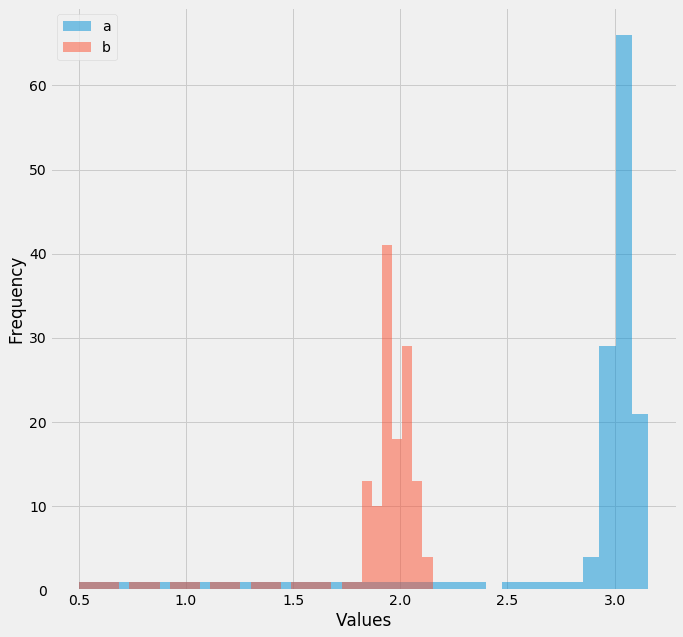

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,10))
plt.hist(a_sample, 35, label = 'a',alpha=0.5);
plt.hist(b_sample, 35, label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.legend()
plt.ylabel('Frequency');

En este último diagrama puede observarse cuáles son los valores de *a* y *b* más frecuentes. Notamos que el valor más frecuente de *b* puede estar muy cercano al valor real de la ordenada al origen de la recta y que el valor de *a* es muy cercano al valor real de la pendiente. 

Obtenemos la media de estos valores para ver qué tanto se acercan a 3 y 2 para a y b, respectivamente. 

In [123]:
mean(a_sample)

2.7583027343904005

In [124]:
mean(b_sample)

1.8518706298685563

Y teníamos razón, estos valores sí son muy cercanos a 3 y 2. 